# Import / Read CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [10]:
df = pd.read_csv('PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

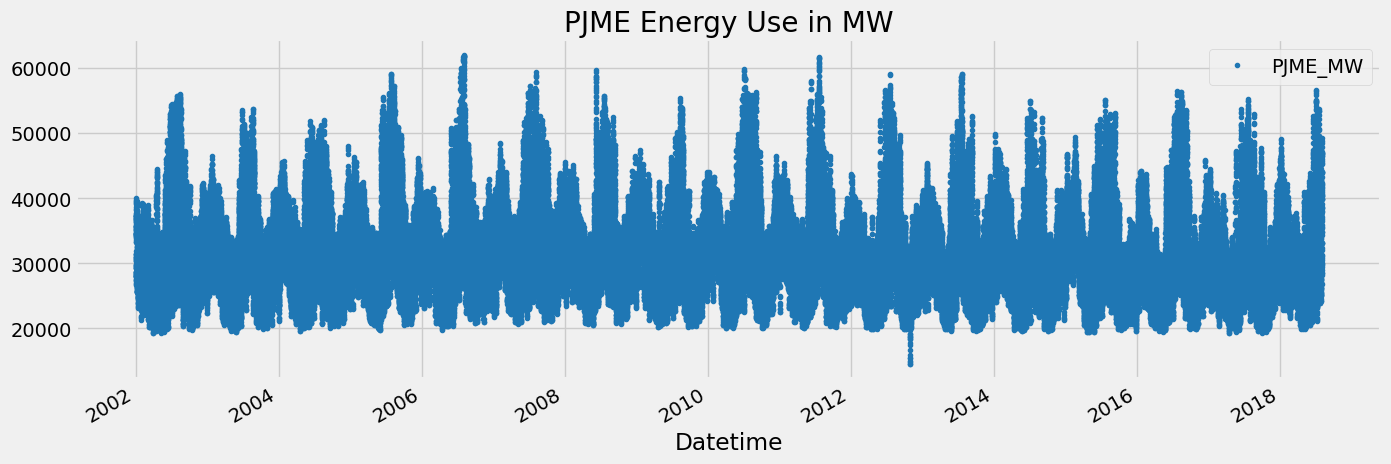

In [11]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()


# Train / Test Split

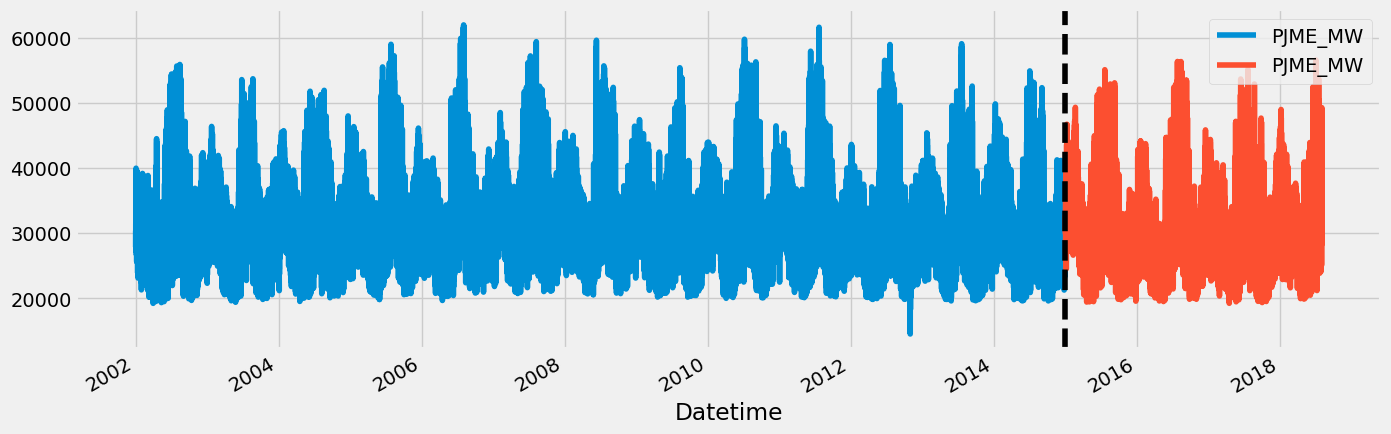

In [12]:
train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
ax.axvline('2015-01-01', color='black', linestyle='--')
plt.show()

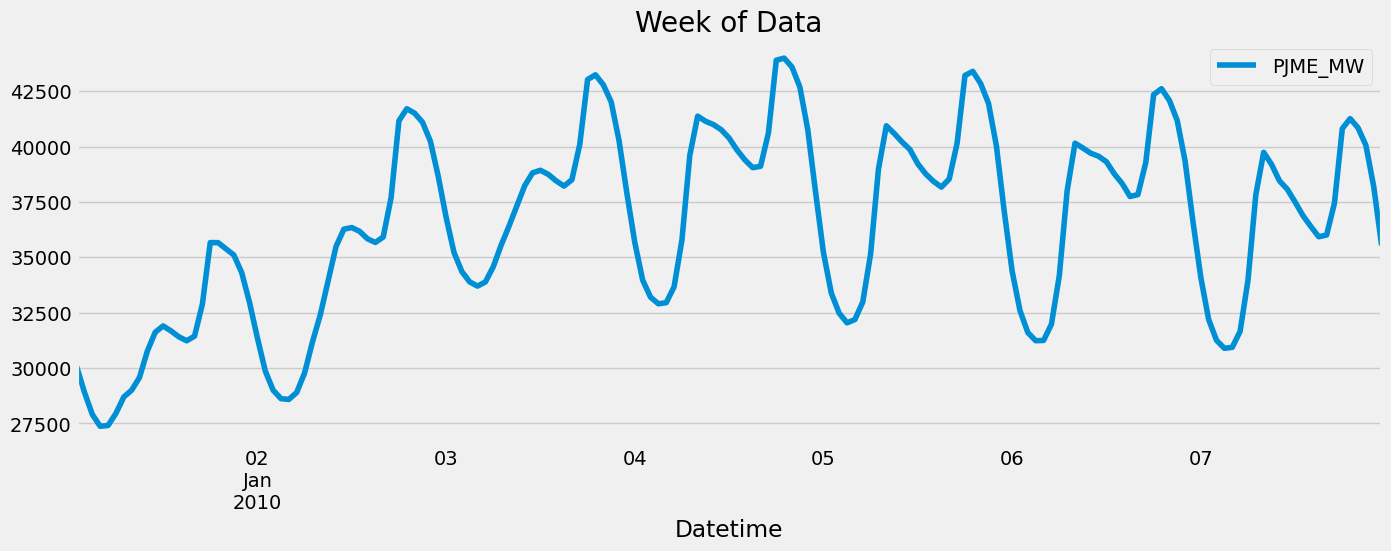

In [13]:
df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-08')].plot(figsize=(15, 5), title='Week of Data')
plt.show()

# Feature Creation

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df.head()
    
    return df

create_features(df=df)


,PJME_MW,hour,dayofweek,quarter,month,year
Datetime,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002
2002-01-01 02:00:00,29265.0,2,1,1,1,2002
2002-01-01 03:00:00,28357.0,3,1,1,1,2002
2002-01-01 04:00:00,27899.0,4,1,1,1,2002
2002-01-01 05:00:00,28057.0,5,1,1,1,2002


# Visualize Feature / Target Relationship

c:\Users\lhanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


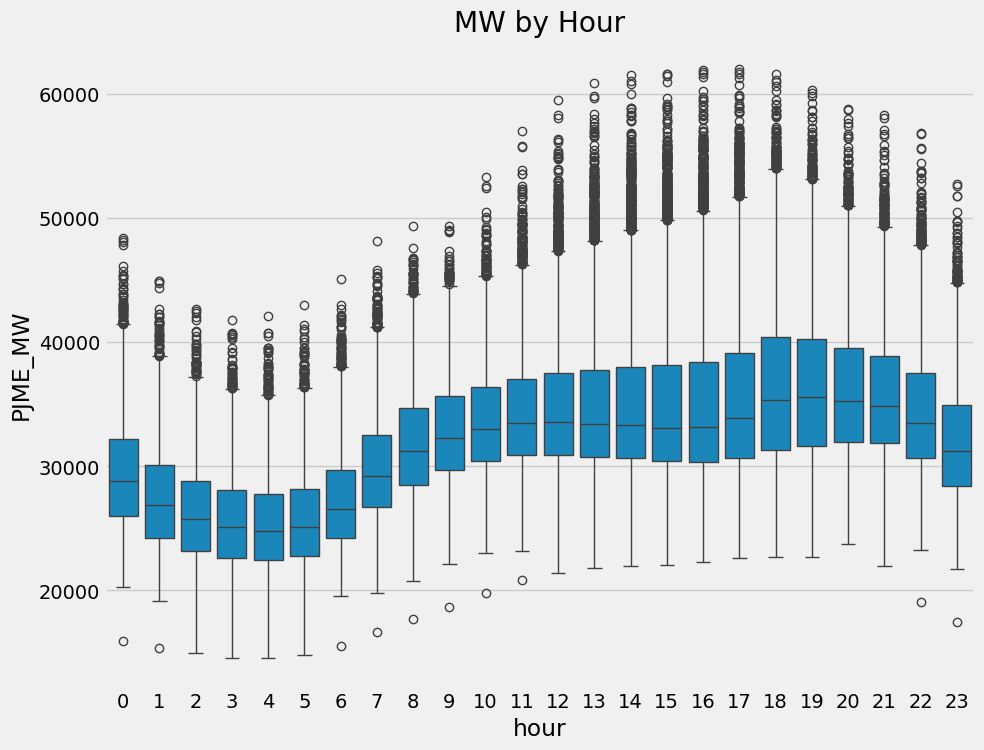

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW', ax=ax)
ax.set_title('MW by Hour')
plt.show()


c:\Users\lhanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


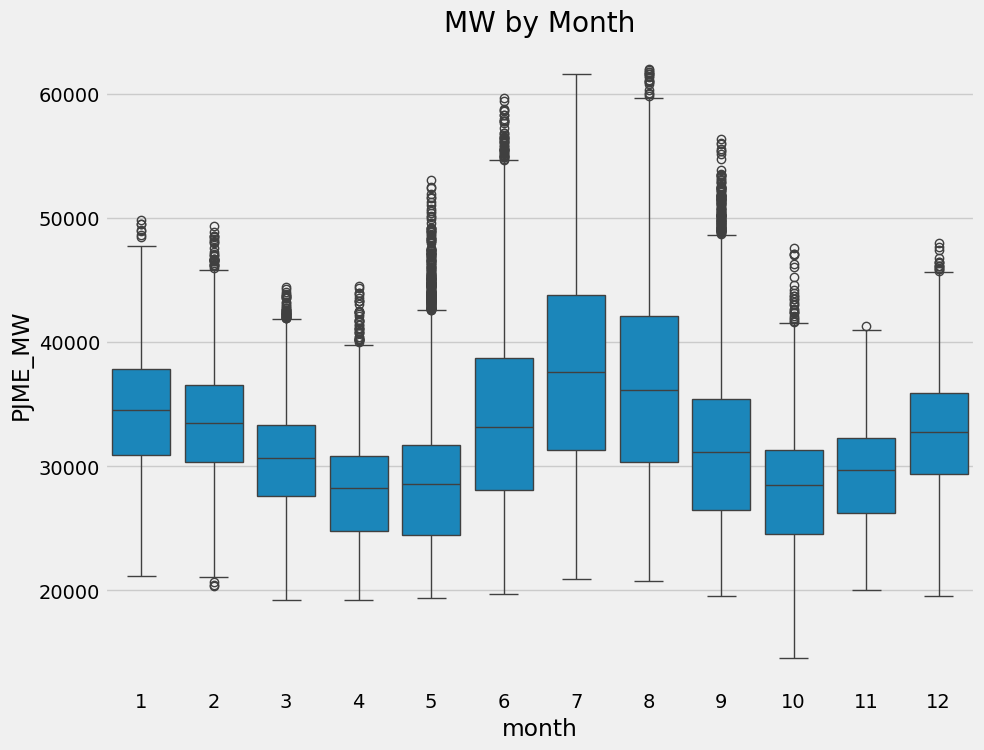

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', ax=ax)
ax.set_title('MW by Month')
plt.show()
